# Credit Card Fraud Detection Using Machine Learning
## Problem Statement:
This project aims to develop a robust credit card fraud detection system using machine learning techniques. With the increasing prevalence of online transactions, credit card fraud has become a serious risk for both consumers and financial institutions. Accurately and quickly identifying fraudulent activities is crucial for reducing financial losses and preserving trust in the banking industry.

## Value Proposition:
The proposed solution provides substantial benefits to financial institutions, cardholders, and online merchants. By effectively detecting fraudulent transactions, it enables timely intervention, minimizing financial losses for banks and reducing inconvenience for customers. Additionally, it enhances the security and reliability of online transactions, helping to boost customer confidence in financial services.

## Data Source:
The dataset used for this project is sourced from the Credit Card Fraud Detection dataset, available at Kaggle  https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/input. This dataset, which contains 284,807 rows and 31 columns.



In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data_df = pd.read_csv("creditcard/creditcard.csv")

## Data Preprocessing

In [6]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [8]:
data_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data missing


In [15]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

## Data unbalance
let us verify data unbalance with respect to traget feature "Class"

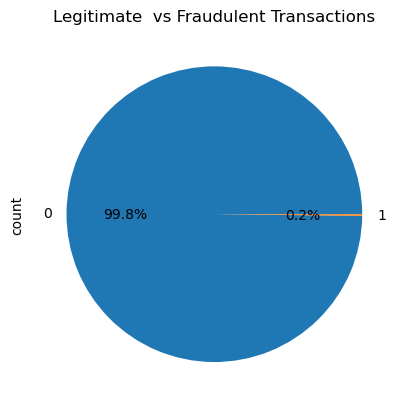

In [19]:
#To identify the balance of the dataset
data_df['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Legitimate  vs Fraudulent Transactions")
plt.show()

#The dataset is imbalanced

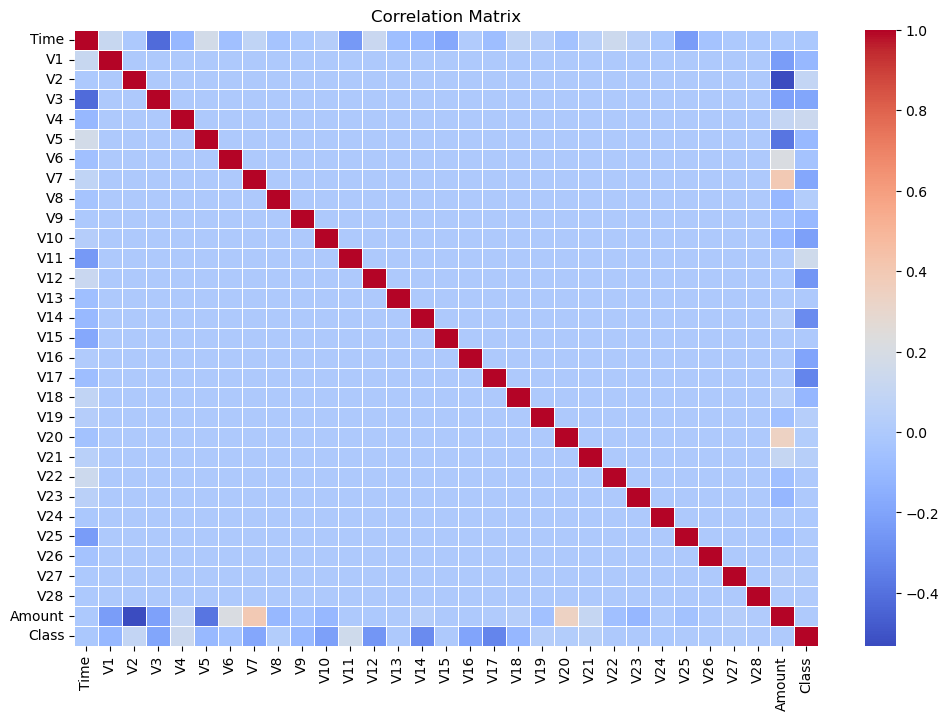

In [21]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr = data_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

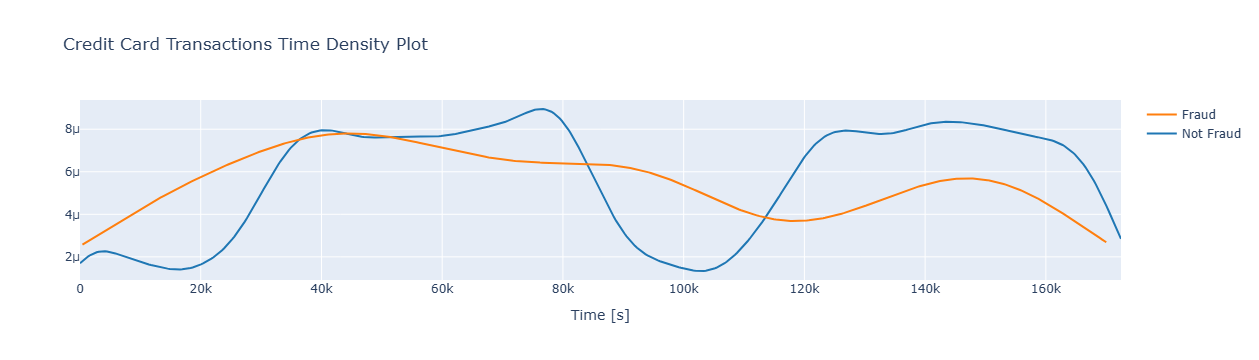

In [23]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


KeyboardInterrupt



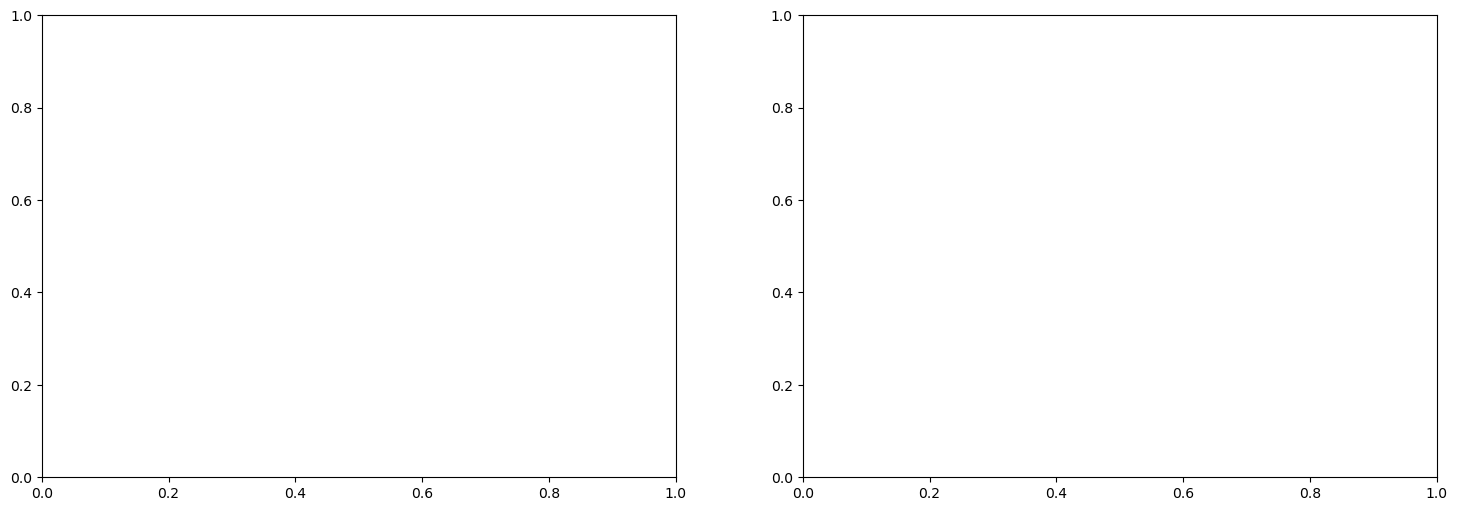

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Time", y="Amount", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Time", y="Amount", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

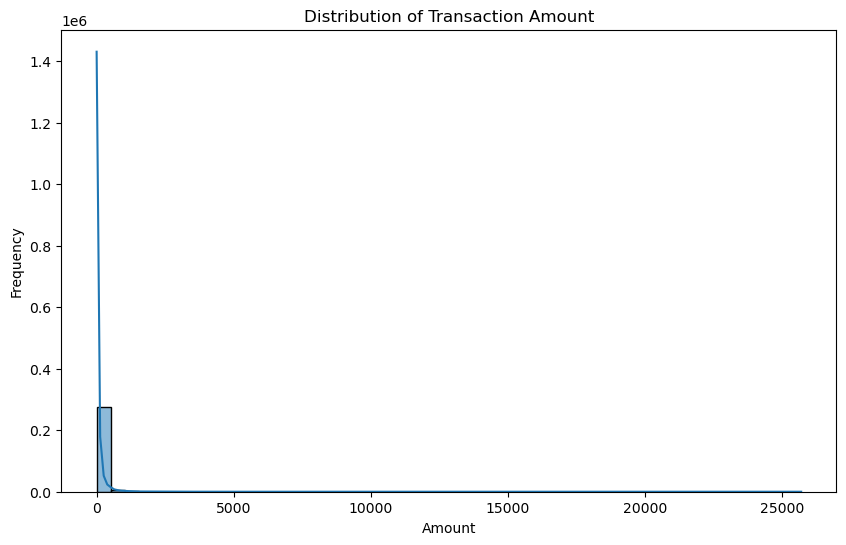

In [27]:
# Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

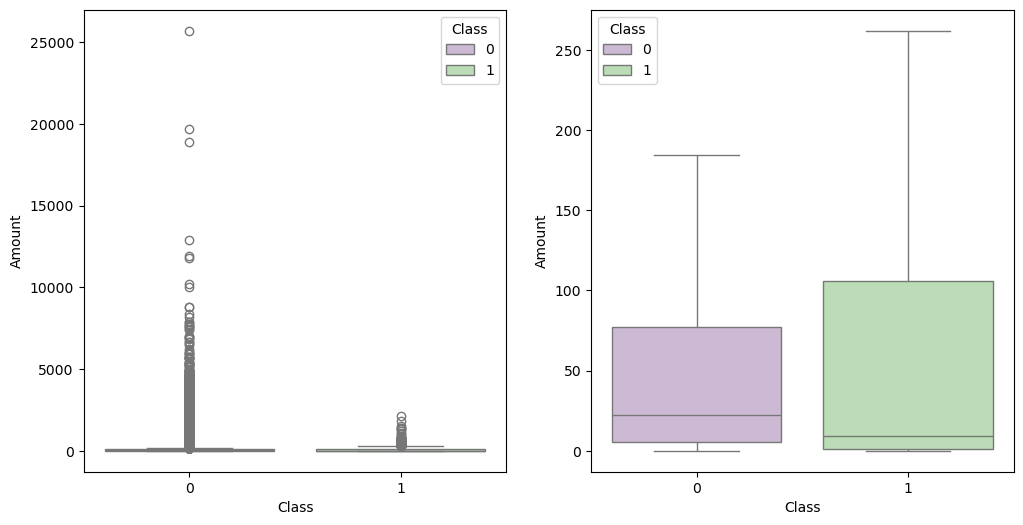

In [29]:
# Boxplot of Amount by Class
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [31]:
# Split features and target variable
X = data_df.drop(columns=["Class"])  # Features variable
y = data_df["Class"]  # Target variable

## Supervised Learning

In [34]:
# Supervised Learning
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Perform cross-validation with appropriate metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(dt_classifier, X, y, scoring=scoring, cv=5)

# Extract and print mean scores
print("Decision Tree Performance Metrics:")
print("Accuracy:", np.mean(cv_results['test_accuracy']))
print("Precision:", np.mean(cv_results['test_precision']))
print("Recall:", np.mean(cv_results['test_recall']))
print("F1 Score:", np.mean(cv_results['test_f1']))

Decision Tree Performance Metrics:
Accuracy: 0.7999859360092297
Precision: 0.5036042803479599
Recall: 0.7374561945990518
F1 Score: 0.5130688893952178


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Evaluate model
y_pred = clf.predict(X_test)

In [46]:
# Perform cross-validation with appropriate metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results1 = cross_validate(clf, X, y, scoring=scoring, cv=5)

# Extract and print mean scores
print("Decision Tree Performance Metrics:")
print("Accuracy:", np.mean(cv_results1['test_accuracy']))
print("Precision:", np.mean(cv_results1['test_precision']))
print("Recall:", np.mean(cv_results1['test_recall']))
print("F1 Score:", np.mean(cv_results1['test_f1']))

Decision Tree Performance Metrics:
Accuracy: 0.7995294834719185
Precision: 0.47057853950149137
Recall: 0.7395176252319109
F1 Score: 0.48330961092494507


In [49]:
# printing feature importance for a Random Forest model

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print("Feature", i+1, "Importance:", importance)

Feature 1 Importance: 0.013302244946528987
Feature 2 Importance: 0.01597609589295174
Feature 3 Importance: 0.011549622200601219
Feature 4 Importance: 0.01770538275265542
Feature 5 Importance: 0.029432723617876962
Feature 6 Importance: 0.012690480593306337
Feature 7 Importance: 0.013409481260914447
Feature 8 Importance: 0.02271318173892186
Feature 9 Importance: 0.012524854567072329
Feature 10 Importance: 0.03588498621224806
Feature 11 Importance: 0.06531367759057143
Feature 12 Importance: 0.09090180034747336
Feature 13 Importance: 0.11219736272572288
Feature 14 Importance: 0.010953272880936464
Feature 15 Importance: 0.12491728886272734
Feature 16 Importance: 0.012733469734854848
Feature 17 Importance: 0.05095026867845474
Feature 18 Importance: 0.16904830736032486
Feature 19 Importance: 0.035424695214107994
Feature 20 Importance: 0.01300763520781552
Feature 21 Importance: 0.0126416648359158
Feature 22 Importance: 0.023694755454682845
Feature 23 Importance: 0.010965195772164739
Feature 24

In [54]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation with appropriate metrics
cv_results_rf = cross_validate(rf_classifier, X, y, scoring=scoring, cv=3)

# Extract and print mean scores
print("Random Forest Performance Metrics:")
print("Accuracy:", np.mean(cv_results_rf['test_accuracy']))
print("Precision:", np.mean(cv_results_rf['test_precision']))
print("Recall:", np.mean(cv_results_rf['test_recall']))
print("F1 Score:", np.mean(cv_results_rf['test_f1']))

Random Forest Performance Metrics:
Accuracy: 0.6698126435670897
Precision: 0.6233619993327492
Recall: 0.8069105691056911
F1 Score: 0.537157740173443


In [57]:
# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation with appropriate metrics
cv_results_lr = cross_validate(lr_classifier, X, y, scoring=scoring, cv=3)

# Extract and print mean scores
print("Logistic Regression Performance Metrics:")
print("Accuracy:", np.mean(cv_results_lr['test_accuracy']))
print("Precision:", np.mean(cv_results_lr['test_precision']))
print("Recall:", np.mean(cv_results_lr['test_recall']))
print("F1 Score:", np.mean(cv_results_lr['test_f1']))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\anaconda3\Lib\site-packages

Logistic Regression Performance Metrics:
Accuracy: 0.9953056032535433
Precision: 0.48918724437798455
Recall: 0.5548780487804879
F1 Score: 0.3712513230634497


# Unsupervised Learning

In [64]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
kmeans_predictions = kmeans.predict(X_scaled)

In [69]:
# Evaluate unsupervised model
print("K-Means Accuracy:", accuracy_score(y, kmeans_predictions))

K-Means Accuracy: 0.5450392722088994


# Deep Learning

In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)

C:\Users\sekha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9956 - loss: 11.9142 - val_accuracy: 0.9983 - val_loss: 3.2134
Epoch 2/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9976 - loss: 0.7317 - val_accuracy: 0.9983 - val_loss: 0.0222
Epoch 3/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9983 - loss: 0.0226 - val_accuracy: 0.9983 - val_loss: 0.0167
Epoch 4/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9982 - loss: 0.0268 - val_accuracy: 0.9982 - val_loss: 0.0215
Epoch 5/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9981 - loss: 0.0161 - val_accuracy: 0.9983 - val_loss: 0.0126
Epoch 6/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9980 - loss: 0.0169 - val_accuracy: 0.9983 - val_loss: 0.0126
Epoch 7/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9984 - loss: 0.0120 - val_accuracy: 0.9983 - val_loss: 0.0126
Epoch 8/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9983 - loss: 

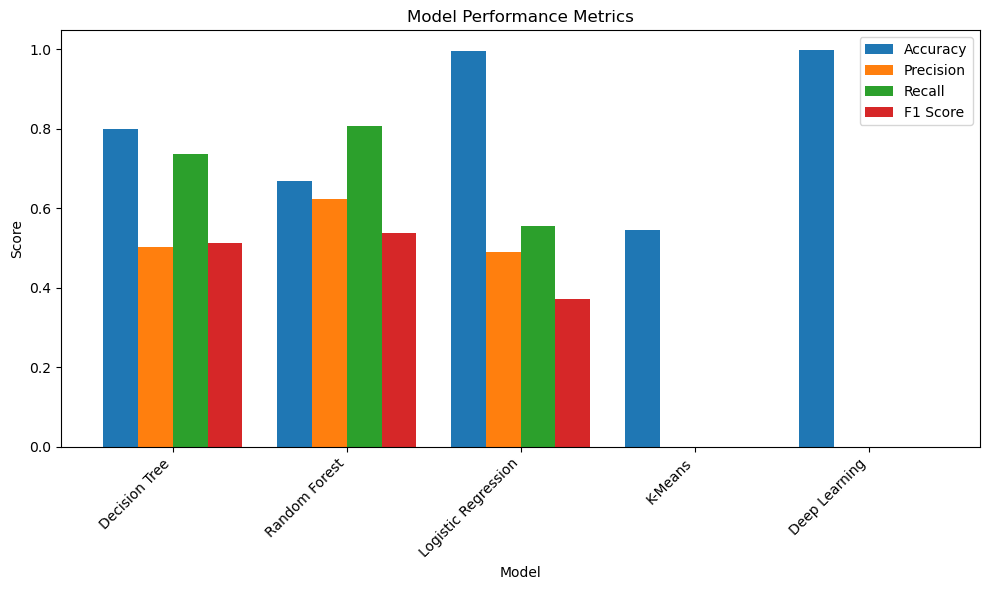

In [77]:
# Define the models and their performance metrics
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Means', 'Deep Learning']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
accuracy = [0.7999859360092297,  0.6698126435670897,  0.9953056032535433, 0.5450392722088994, 0.9982795715332031]
precision = [0.5036042803479599, 0.6233619993327492,0.48918724437798455, 0, 0]  # Replace None with 0
recall = [0.7374561945990518, 0.8069105691056911, 0.5548780487804879, 0, 0]  # Replace None with 0
f1_score = [0.5130688893952178, 0.537157740173443, 0.3712513230634497, 0, 0]  # Replace None with 0


# Create a grouped bar plot
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Error Analysis with the best model - Deep Learning

In [83]:
# Convert Pandas Series to NumPy array
y_test_array = y_test.to_numpy()

# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Identify misclassified indices
misclassified_indices = np.where(y_pred_binary.flatten() != y_test_array.flatten())[0]

# Extract misclassified instances and true labels
misclassified_instances = X_test.iloc[misclassified_indices]
true_labels = y_test_array[misclassified_indices]

# Print misclassified instances and their true labels
for i, (instance, true_label) in enumerate(zip(misclassified_instances.values, true_labels)):
    print("Misclassified Instance #{}:".format(i+1))
    print("Instance:", instance)
    print("True Label:", true_label)
    print()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Misclassified Instance #1:
Instance: [ 4.15050000e+04 -1.65265066e+01  8.58497180e+00 -1.86498532e+01
  9.50559352e+00 -1.37938185e+01 -2.83240430e+00 -1.67016943e+01
  7.51734390e+00 -8.50705864e+00 -1.41101844e+01  5.29923635e+00
 -1.08340065e+01  1.67112025e+00 -9.37385858e+00  3.60805642e-01
 -9.89924654e+00 -1.92362924e+01 -8.39855199e+00  3.10173537e+00
 -1.51492344e+00  1.19073869e+00 -1.12767001e+00 -2.35857877e+00
  6.73461329e-01 -1.41369967e+00 -4.62762361e-01 -2.01857525e+00
 -1.04280417e+00  3.64190000e+02]
True Label: 1

Misclassified Instance #2:
Instance: [ 7.42620000e+04 -2.25053481e+00  2.36575488e+00 -2.95549118e+00
  8.97905975e-02 -2.83074457e+00 -8.44461639e-01 -1.74061561e-01
 -4.07138138e-01  1.74216294e-01 -2.99892626e+00  2.60516858e+00
 -3.67771661e+00 -9.61254636e-01 -4.62948100e+00  1.94218161e+00
 -4.18037888e+00 -4.60568647e+00 -2.55718414e+00  1.58958220e+00
 -4.86537142e-01  2.56559618e-01 -4.66245243e-01  2.91

In [85]:
# Identify misclassified indices
misclassified_indices = np.where(y_pred_binary.flatten() != y_test_array.flatten())[0]

# Count the number of misclassified instances
misclassified_count = len(misclassified_indices)

# Print the count of misclassified instances
print("Number of Misclassified Instances:", misclassified_count)


Number of Misclassified Instances: 98


In [88]:
# Count the number of misclassified instances for each class
misclassified_counts = {
    "Class 0": np.sum((y_pred_binary.flatten() == 0) & (y_test_array.flatten() == 1)),
    "Class 1": np.sum((y_pred_binary.flatten() == 1) & (y_test_array.flatten() == 0))
}

# Calculate the total number of instances for each class
total_counts = {
    "Class 0": np.sum(y_test_array == 0),
    "Class 1": np.sum(y_test_array == 1)
}

# Calculate the proportion of misclassified instances for each class
proportions = {cls: misclassified_counts[cls] / total_counts[cls] for cls in misclassified_counts}

# Print the proportions
for cls, proportion in proportions.items():
    print("Proportion of {} Misclassified: {:.2f}%".format(cls, proportion * 100))

Proportion of Class 0 Misclassified: 0.17%
Proportion of Class 1 Misclassified: 0.00%


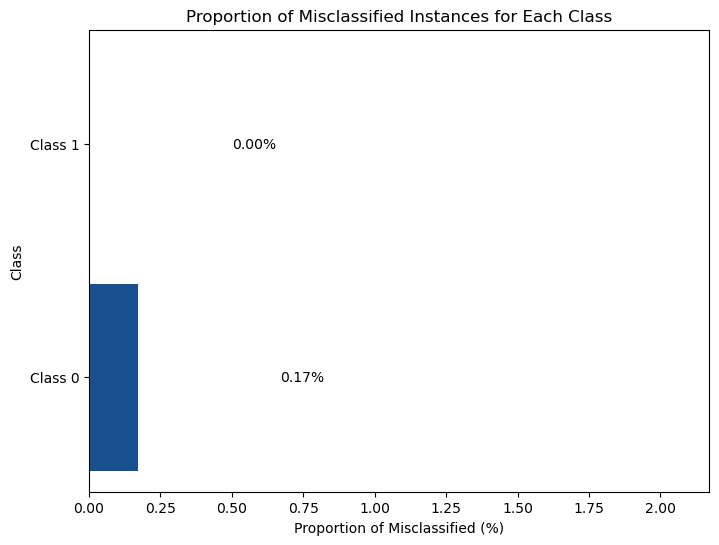

In [93]:
# Data
classes = ['Class 0', 'Class 1']
proportions = [0.17, 0.00]  # Proportions in percentage


# Plot
plt.figure(figsize=(8, 6))
plt.barh(classes, proportions, color=['#195190FF', '#E94B3CFF'])

# Add percentage values to the bars
for i, v in enumerate(proportions):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.xlabel('Proportion of Misclassified (%)')
plt.ylabel('Class')
plt.title('Proportion of Misclassified Instances for Each Class')
plt.xlim(0, max(proportions) + 2)  # Set x-axis limit to ensure correct proportion display
plt.show()

In [95]:
# Generate predictions (these will likely be probabilities if using sigmoid/softmax)
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
# Use threshold 0.5 if it's binary classification (e.g., Class 0 and Class 1)
y_pred = (y_pred_prob > 0.5).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [97]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56864
     Class 1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [117]:
from xgboost import XGBClassifier

In [115]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.4/124.9 MB 20.2 MB/s eta 0:00:07
   --- ------------------------------------ 9.4/124.9 MB 23.5 MB/s eta 0:00:05
   ----- ---------------------------------- 15.7/124.9 MB 24.7 MB/s eta 0:00:05
   ------ --------------------------------- 19.7/124.9 MB 23.4 MB/s eta 0:00:05
   ------- -------------------------------- 23.9/124.9 MB 21.9 MB/s eta 0:00:05
   --------- ------------------------------ 28.8/124.9 MB 22.0 MB/s eta 0:00:05
   ---------- ----------------------------- 33.8/124.9 MB 22.1 MB/s eta 0:00:05
   ------------ --------------------------- 38.0/124.9 MB 21.6 MB/s eta 0:00:05
   -------------- ------------------------- 44.0/124.9 MB 22.2 MB/s eta 0:00:04
   --------------- ------------------------ 49.5/124.9 MB 22.4 MB/s

In [119]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

C:\Users\sekha\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning:

[07:23:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.9995259997893332
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Observations:

### Model Performance Variability:
The accuracy of the models varied significantly, with Logistic Regression (0.995) and Deep Learning (0.998) showing exceptionally high accuracy. In contrast, Random Forest (0.670) and K-Means (0.545) performed poorly, indicating variability in model effectiveness.
### Class Imbalance:
There is a substantial class imbalance in the dataset, with Class 0 having significantly more samples (56,864) than Class 1 (98). This imbalance heavily influences the models, particularly affecting precision and recall.
### Precision and Recall Discrepancies:
High accuracy does not correlate with good precision and recall across all models. For instance, the Deep Learning model achieved high accuracy but failed to classify any instances of Class 1 (0.00 precision and recall).
### XGBoost's Balanced Performance:
XGBoost exhibited a strong performance across both classes, achieving good precision (0.88) and recall (0.84) for Class 1, making it a favorable choice for practical applications.
### Model Suitability:
While some models like Decision Trees and Random Forests had decent overall accuracy, they struggled with classifying the minority class effectively. This is evident in their lower precision and F1 scores.
## Challenges:
### Class Imbalance Impact:
The significant imbalance between Class 0 and Class 1 led to models being biased towards the majority class, which is a common challenge in classification problems.
### Overfitting:
Models like Deep Learning potentially overfit the training data, as indicated by their ability to accurately predict Class 0 while failing to recognize Class 1. This raises concerns about generalization.
### Computational Resources:
Training and tuning advanced models like Deep Learning and XGBoost require significant computational resources and time, which can be a barrier, especially with large datasets.

## Conclusion:
### Model Selection:
Based on the results, XGBoost appears to be the most effective model for this classification task, demonstrating a balanced ability to predict both classes while handling the class imbalance better than others.
### Need for Class Handling Strategies:
To improve overall model performance, especially for minority classes, implementing strategies to handle class imbalance—such as resampling techniques or adjusted class weights—should be prioritized.
### Further Model Refinement:
Continuous refinement and tuning of the selected models, particularly XGBoost and the Deep Learning model, will likely yield improvements in classification performance.
